In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'utkface-new:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F44109%2F78156%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240413%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240413T061743Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6ac108ed98108b39a37b71c2bd6f656b4ddb50ac7f49806c420d2f94367b99286f7bf76fbb77db09a379010dcc55df0e7c5cc5b9dc126edf2f701c7985f29b2c41cff17a3d0826cf94a2e271352b373909e1b4bb864ea2a61212097655deb158a21530d1cb7b355ea0f2197cb8a9ac84c69822592d306672f5113f777b209314dad25096cf9e55d206e3cec8dbb25b0dbdfc6617d09c2cbd068da4242e3d990521740c7aaca3901e907c934d4e079a392fa91110a1aea880ebac661ecc310d357a274a7e604f311e96cbcd95897788f224900af5cac002c19cf80aed7f6d69dcdb8dc812e3ecea1890f432a245ec803f0a04f9da6742b6a98e63f49d87a82a1a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 347342542 bytes downloaded
Downloaded and uncompressed: utkface-new
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/utkface-new/crop_part1/75_0_0_20170111204851535.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/25_1_3_20170104234944475.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/3_1_0_20170109192758746.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/60_1_0_20170110160643720.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/1_1_3_20161219225515600.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/28_0_0_20170108225116577.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/55_1_3_20170109142107754.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/1_0_3_20161219230534953.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/25_1_4_20170103235222492.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/1_0_2_20170109192102236.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/18_1_0_20170109212814819.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/7_0_0_20170110224332642.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/5_1_3_20161220145

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/utkface-new/UTKFace/32_0_4_20170103235510730.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170103182854050.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/23_0_1_20170113195548821.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/20_1_2_20170116170350603.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/56_1_2_20170107213838566.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/15_1_4_20170103233348795.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/14_1_2_20170104012506017.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/61_0_0_20170104210224700.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/32_0_1_20170116204750750.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/1_0_0_20170109191808532.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_0_0_20170120223924629.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/25_1_0_20170103181255384.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/8_0_3_20170110215701316.jpg.chip.jpg
/kaggle/input/u

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
# Load the Dataset
BASE_DIR = '../input/utkface-new/UTKFace/'

In [ ]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)


  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 23708, Number of gender_labels: 23708, Number of image_paths: 23708


In [ ]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,../input/utkface-new/UTKFace/26_1_3_2017011715...,26,1
1,../input/utkface-new/UTKFace/52_0_0_2017010421...,52,0
2,../input/utkface-new/UTKFace/22_1_3_2017011916...,22,1
3,../input/utkface-new/UTKFace/55_1_3_2017011920...,55,1
4,../input/utkface-new/UTKFace/26_1_0_2017011623...,26,1


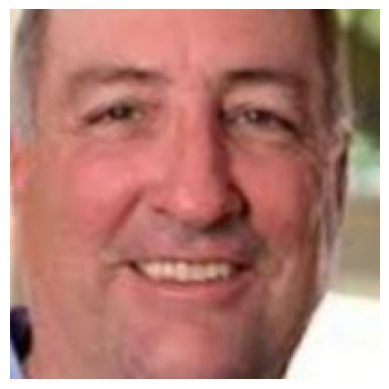

In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}
# Exploratory Data Analysis
from PIL import Image
img = Image.open(df['image'][1])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

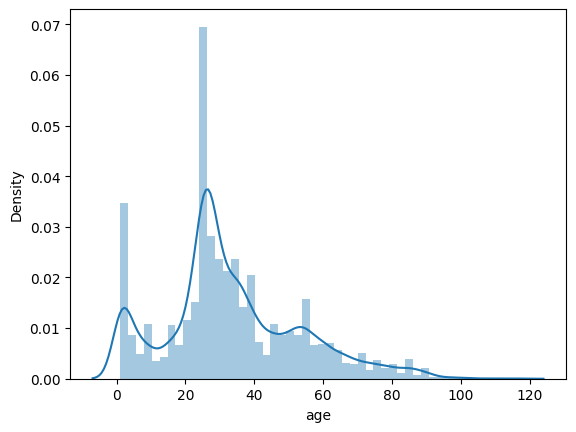

In [ ]:
sns.distplot(df['age'])

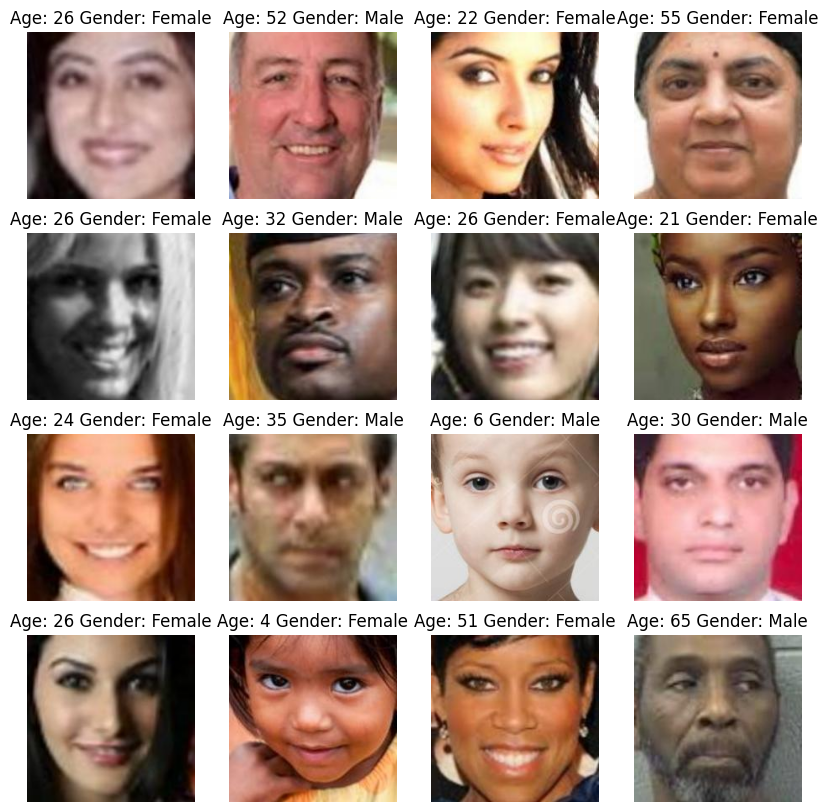

In [ ]:
plt.figure(figsize=(10, 10))
samples = df.iloc[0:16]

for index, sample, age, gender in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_dict[gender]}')
    plt.imshow(img)

In [ ]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_image_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape

(23708, 128, 128, 1)

In [ ]:
X = X / 255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

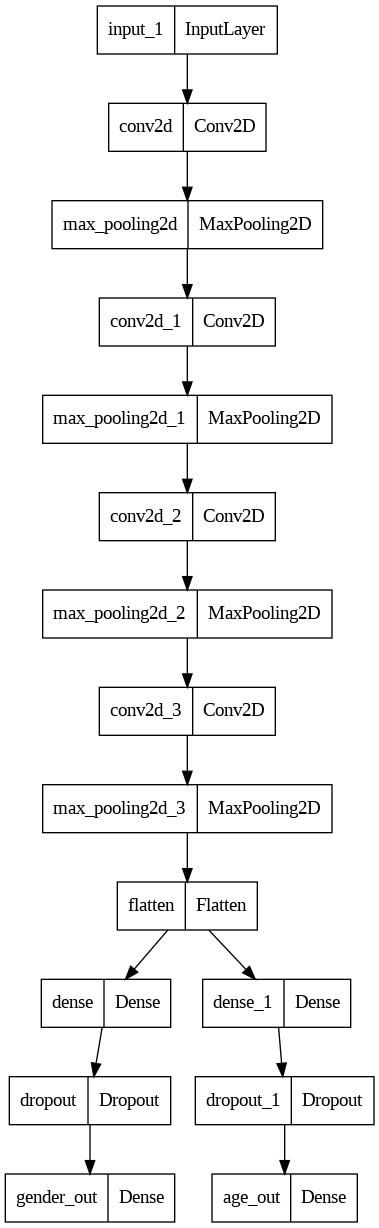

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 739s 1s/step - loss: 15.6911 - gender_out_loss: 0.6694 - age_out_loss: 15.0217 - gender_out_accuracy: 0.5746 - age_out_accuracy: 0.0465 - val_loss: 12.5831 - val_gender_out_loss: 0.5185 - val_age_out_loss: 12.0646 - val_gender_out_accuracy: 0.7461 - val_age_out_accuracy: 0.0470
Epoch 2/30
593/593 [==============================] - 708s 1s/step - loss: 11.3731 - gender_out_loss: 0.4723 - age_out_loss: 10.9009 - gender_out_accuracy: 0.7748 - age_out_accuracy: 0.0251 - val_loss: 10.7162 - val_gender_out_loss: 0.4094 - val_age_out_loss: 10.3069 - val_gender_out_accuracy: 0.8054 - val_age_out_accuracy: 0.0070
Epoch 3/30
593/593 [==============================] - 713s 1s/step - loss: 9.6469 - gender_out_loss: 0.3978 - age_out_loss: 9.2491 - gender_out_accuracy: 0.8158 - age_out_accuracy: 0.0135 - val_loss: 9.0327 - val_gender_out_loss: 0.3553 - val_age_out_loss: 8.6774 - val_gender_out_accuracy: 0.8342 - val_age_out_accuracy: 0.0131
Epoch

Original Gender: Female Original Age: 70
1/1 [==============================] - 0s 283ms/step
Predicted Gender: Female Predicted Age: 62


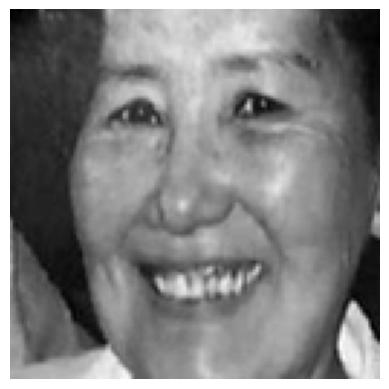

In [ ]:
image_index = 102
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 24
1/1 [==============================] - 0s 47ms/step
Predicted Gender: Male Predicted Age: 20


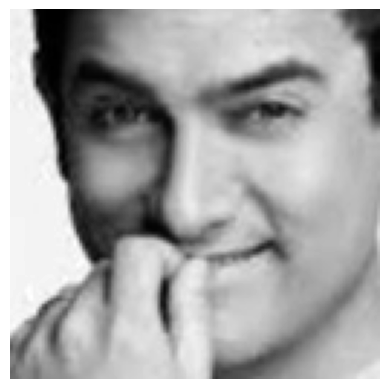

In [ ]:
image_index = 3002
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');